In [30]:
# librerías
import numpy as np
import pandas as pd

In [31]:
#Primer visualización de la base de datos.
df = pd.read_csv("pima-indians-diabetes.csv")
df

,Embarazos,Glucosa,Presion,Piel,Prueba,BMI,DPF,Edad,Clase
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [32]:
# se calcula la impureza de gini
def gini_impurity(df):
    clase = df['Clase'].value_counts()
    total_samples = len(df)
    gini = 1 - sum((clase / total_samples) ** 2)
    return gini

# EN TODO EL dataset, se calcula la impureza de gini.
initial_gini = gini_impurity(df)
print(f'Impureza Gini inicial: {initial_gini}')

Impureza Gini inicial: 0.45437282986111116


Exactitud: 0.7662337662337663
Precisión 0.7733625443831683


[Text(0.46138822115384615, 0.9642857142857143, 'Glucosa <= 127.5\ngini = 0.453\nsamples = 614\nvalue = [401, 213]'),
 Text(0.16496394230769232, 0.8928571428571429, 'Edad <= 28.5\ngini = 0.314\nsamples = 390\nvalue = [314, 76]'),
 Text(0.057692307692307696, 0.8214285714285714, 'BMI <= 30.95\ngini = 0.142\nsamples = 221\nvalue = [204, 17]'),
 Text(0.019230769230769232, 0.75, 'DPF <= 0.672\ngini = 0.016\nsamples = 124\nvalue = [123, 1]'),
 Text(0.009615384615384616, 0.6785714285714286, 'gini = 0.0\nsamples = 108\nvalue = [108, 0]'),
 Text(0.028846153846153848, 0.6785714285714286, 'DPF <= 0.686\ngini = 0.117\nsamples = 16\nvalue = [15, 1]'),
 Text(0.019230769230769232, 0.6071428571428571, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.038461538461538464, 0.6071428571428571, 'gini = 0.0\nsamples = 15\nvalue = [15, 0]'),
 Text(0.09615384615384616, 0.75, 'Presion <= 37.0\ngini = 0.275\nsamples = 97\nvalue = [81, 16]'),
 Text(0.08653846153846154, 0.6785714285714286, 'gini = 0.0\nsamples =

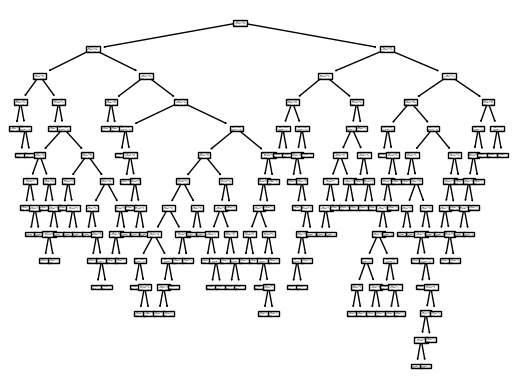

In [33]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score



features = ["Embarazos",'Glucosa',"Presion","Piel",'Prueba',"BMI", 'DPF',"Edad"]

X = df[features]
y = df['Clase']

#Dividimos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


clf = DecisionTreeClassifier()

clftree = clf.fit(X_train, y_train)

# Realizar predicciones en los datos de prueba
y_pred = clf.predict(X_test)

# Calcular la Exactitud del modelo
accuracy = accuracy_score(y_test, y_pred)
preci = precision_score(y_test, y_pred,average="weighted")
print("Exactitud:", accuracy)
print("Precisión", preci)



tree.plot_tree(clftree, feature_names=features)

In [34]:
print(clftree.predict([[1, 148, 72, 35, 0, 33.6, 0.627, 50]]))
#Para entender si la respuesta se interpreta de la siguiente manera:
# 1 si conviene ir
# 0 si NO conviene ir

[1]


c:\Users\Carlos Casillas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


## Árbol de regresión.

In [35]:
from sklearn.preprocessing import LabelEncoder


In [36]:
x = df[features]
y = df['Clase']

#ya se la saben:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3)


In [37]:
#Corremos nuestro modelo:

dtree = DecisionTreeClassifier()
dtree.fit(x_train, y_train)  #entrenamiento: covars y respuesta
pred = dtree.predict(x_test)  #predicción con covars no entrenadas.

#Veamos la exactitud del modelo:
accuracy_score(y_test, pred)

0.7142857142857143

[Text(0.5185072815533981, 0.9583333333333334, 'Glucosa <= 127.5\ngini = 0.465\nsamples = 537\nvalue = [340, 197]'),
 Text(0.2967233009708738, 0.875, 'Edad <= 28.5\ngini = 0.309\nsamples = 324\nvalue = [262, 62]'),
 Text(0.14199029126213591, 0.7916666666666666, 'BMI <= 30.95\ngini = 0.16\nsamples = 182\nvalue = [166, 16]'),
 Text(0.13228155339805825, 0.7083333333333334, 'gini = 0.0\nsamples = 102\nvalue = [102, 0]'),
 Text(0.15169902912621358, 0.7083333333333334, 'BMI <= 45.4\ngini = 0.32\nsamples = 80\nvalue = [64, 16]'),
 Text(0.10436893203883495, 0.625, 'BMI <= 33.65\ngini = 0.284\nsamples = 76\nvalue = [63, 13]'),
 Text(0.038834951456310676, 0.5416666666666666, 'Glucosa <= 97.5\ngini = 0.472\nsamples = 21\nvalue = [13, 8]'),
 Text(0.019417475728155338, 0.4583333333333333, 'BMI <= 31.3\ngini = 0.18\nsamples = 10\nvalue = [9, 1]'),
 Text(0.009708737864077669, 0.375, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.02912621359223301, 0.375, 'gini = 0.0\nsamples = 9\nvalue = [9, 0]')

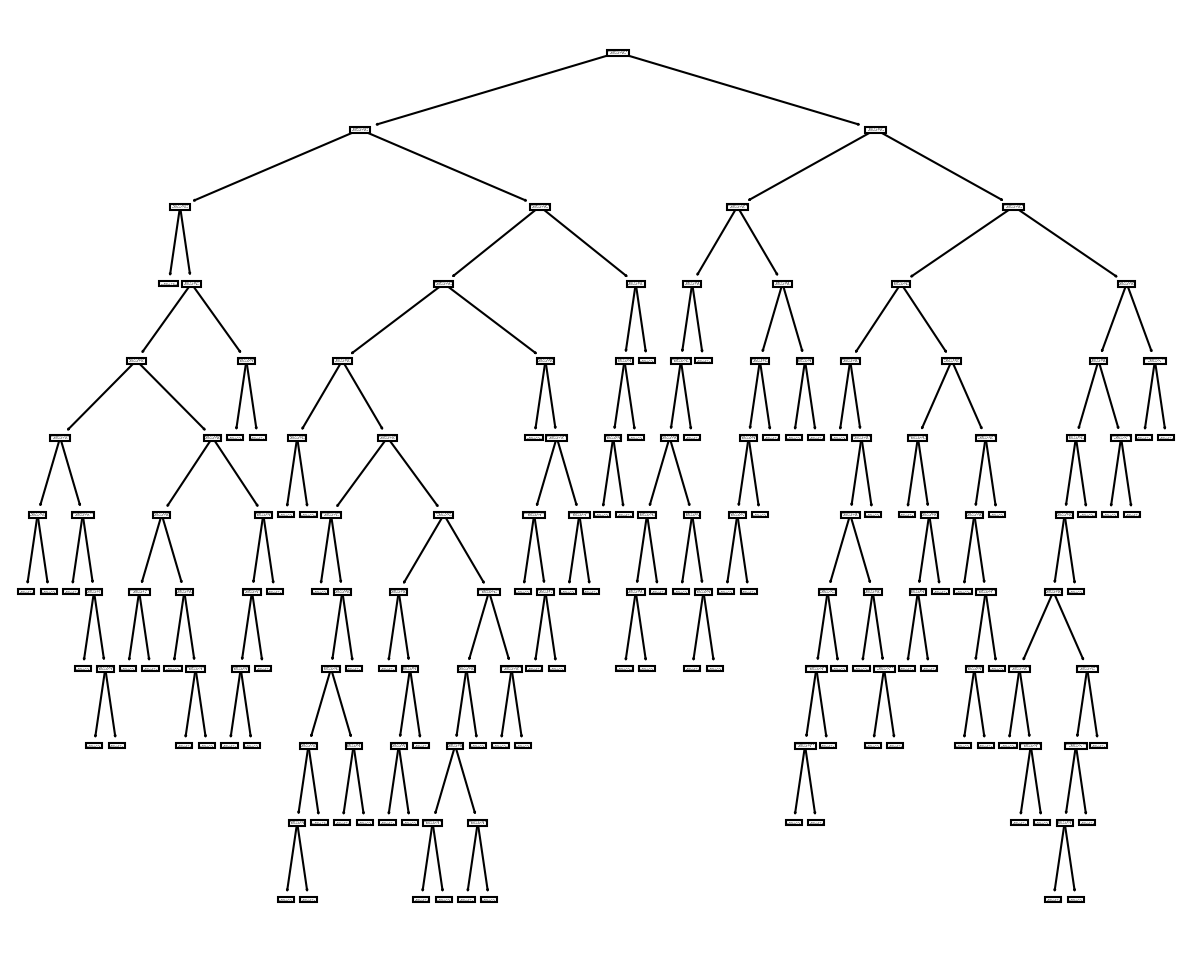

In [38]:
from sklearn.tree import plot_tree

# Convierte el Index a una lista de nombres de columnas
feature_names_list = x.columns.tolist()

# Luego, utiliza esta lista al llamar a plot_tree
plt.figure(figsize=(10, 8), dpi=150)
plot_tree(dtree, feature_names=feature_names_list)


In [39]:
#Evaluamos el modelo con este criterio de Gini...
dtree = DecisionTreeClassifier(criterion='gini')
dtree.fit(x_train, y_train)
pred = dtree.predict(x_test)
print('Criterion=gini', accuracy_score(y_test, pred))

Criterion=gini 0.696969696969697


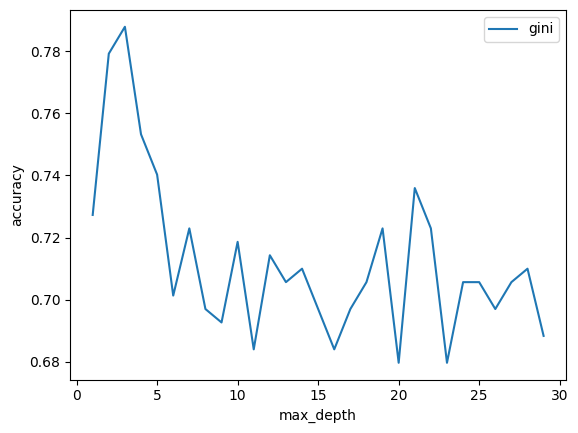

In [40]:
#Podemos generar un programa para probar el árbol
#con varios niveles de profundidad y ver cuál es el mejor
#según nuestro criterio de gini.
max_depth = []
acc_gini = []
for i in range(1,30):
 dtree = DecisionTreeClassifier(criterion="gini", max_depth=i)
 dtree.fit(x_train, y_train)
 pred = dtree.predict(x_test)
 acc_gini.append(accuracy_score(y_test, pred))
 max_depth.append(i)
d = pd.DataFrame({"acc_gini":pd.Series(acc_gini),
 "max_depth":pd.Series(max_depth)})
# veamos cómo se comporta gini dependiendo de la profundidad.
plt.plot("max_depth","acc_gini", data=d, label="gini")
plt.xlabel("max_depth")
plt.ylabel("accuracy")
plt.legend()

### Ejemplo de árbol de regresión con profundidad 3

In [47]:
#Volvemos a correr nuestro modelo PERO le ponemos una profundidad máxima.
#Misma que elegimos basado en el gini de los múltiples modelos propuestos.
dtree = DecisionTreeClassifier(criterion="gini", max_depth=3)
dtree.fit(x_train, y_train)
pred = dtree.predict(x_test)
accuracy_score(y_test, pred)

0.7878787878787878

[Text(0.5, 0.875, 'Glucosa <= 127.5\ngini = 0.465\nsamples = 537\nvalue = [340, 197]'),
 Text(0.25, 0.625, 'Edad <= 28.5\ngini = 0.309\nsamples = 324\nvalue = [262, 62]'),
 Text(0.125, 0.375, 'BMI <= 30.95\ngini = 0.16\nsamples = 182\nvalue = [166, 16]'),
 Text(0.0625, 0.125, 'gini = 0.0\nsamples = 102\nvalue = [102, 0]'),
 Text(0.1875, 0.125, 'gini = 0.32\nsamples = 80\nvalue = [64, 16]'),
 Text(0.375, 0.375, 'Prueba <= 142.5\ngini = 0.438\nsamples = 142\nvalue = [96, 46]'),
 Text(0.3125, 0.125, 'gini = 0.399\nsamples = 127\nvalue = [92, 35]'),
 Text(0.4375, 0.125, 'gini = 0.391\nsamples = 15\nvalue = [4, 11]'),
 Text(0.75, 0.625, 'BMI <= 30.0\ngini = 0.464\nsamples = 213\nvalue = [78, 135]'),
 Text(0.625, 0.375, 'Glucosa <= 145.5\ngini = 0.464\nsamples = 52\nvalue = [33, 19]'),
 Text(0.5625, 0.125, 'gini = 0.346\nsamples = 27\nvalue = [21, 6]'),
 Text(0.6875, 0.125, 'gini = 0.499\nsamples = 25\nvalue = [12, 13]'),
 Text(0.875, 0.375, 'Glucosa <= 157.5\ngini = 0.403\nsamples = 161\nva

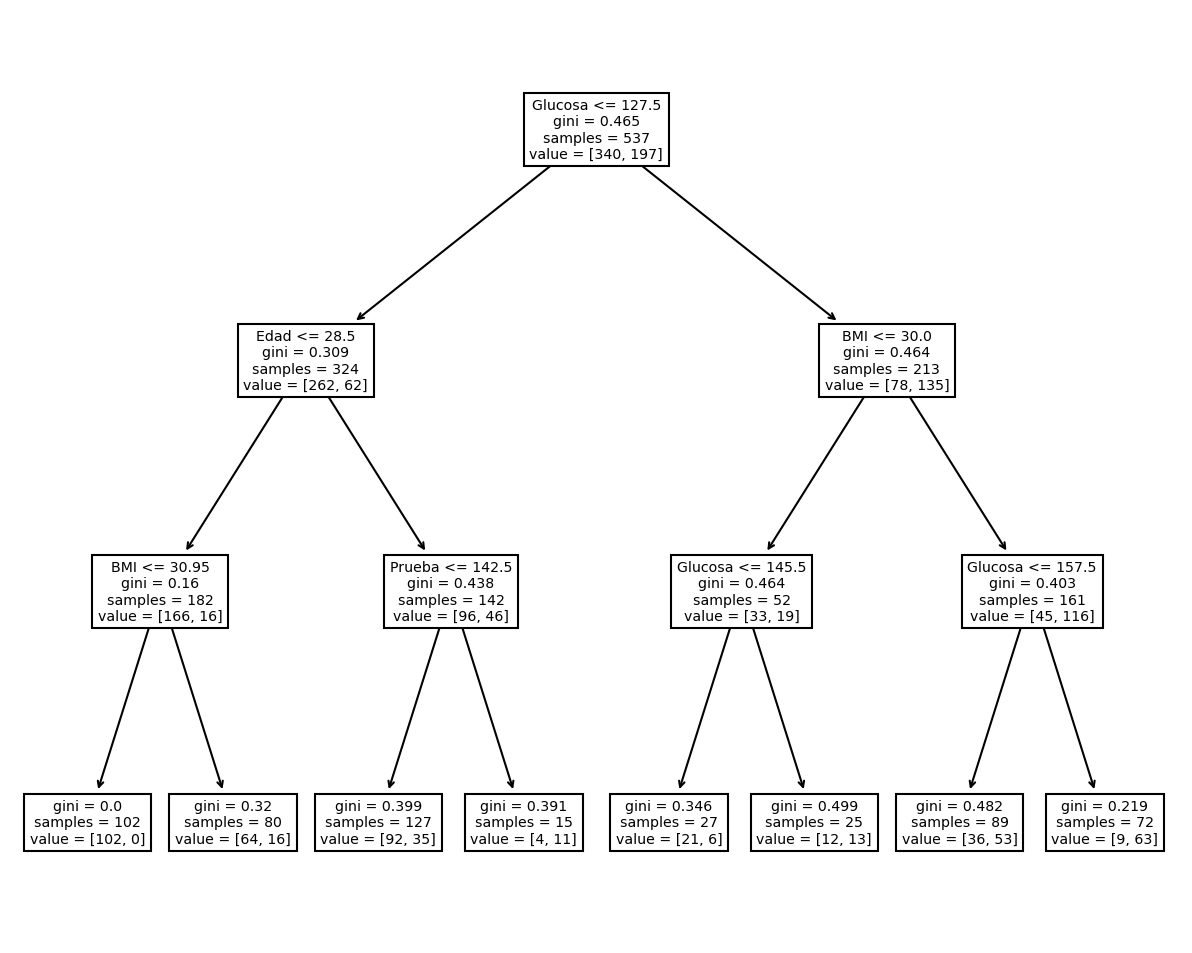

In [48]:
from sklearn.tree import plot_tree

# Convierte el Index a una lista de nombres de columnas
feature_names_list = x.columns.tolist()

# Luego, utiliza esta lista al llamar a plot_tree
plt.figure(figsize=(10, 8), dpi=150)
plot_tree(dtree, feature_names=feature_names_list)
